# Лабораторная работа №4 (Обучение без учителя)

## Задание

Задание основывается на задании из лабораторной работы №2 (обучение с учителем). Однако, в данном задании, вместо алгоритмов обучения с учителем будут использоваться иной класс алгоритмов. Рассматриваемые алгоритмы называются алгоритмами кластеризации. Они применяеются тогда, когда изначально неизвестна структура данных, и нам хотелось бы разбить данные на заранее неизвестные группы. В таком случае возникает следующие вопросы: как измерять оптимальность разбиения и как задать оптимизационную функцию алгоритмов. Также в данной Л. Р. вам предстоит уменьшить размерность входных данных для потенциального улучшения модели и / или времени её построения.

1. Изучить заданный вариантом метод кластеризации
2. Загрузить набор статей согласно заданию Л. Р. №2
3. Отфильтровать статьи с нужными тегами согласно заданию Л. Р. №2
4. Закодировать статьи МЕТОДОМ TF-IDF (не тем методом, который указан в Л. Р. №2)
5. Снизить размерность путем отбрасывания малозначимых слов. Для этого нужно отсортировать все слова по убыванию среднего значения TF-IDF, и отбросить те признаки (слова), что не попадают в топ 20%
6. Построить модель по варианту. 
    1. В параметрах модели задать число кластеров равное количество категорий в исходных данных. (Если бы не было известно их исходное число, можно было бы варьировать данный параметр) 
    2. .fit()
7. Вывести следующие метрики для построенной модели:
    1. Время построения модели
    2. Вывести среднее значение метрики Silhouette.
    3. С помощью метрики Silhoutte найти самых образцовых, по мнению модели, представителей каждего кластера, вывести их, и попытаться отнести их к одной из исходных категорий.
    4. ACHV (Accuracy, Homogeneity, Completeness, V-Measure)
    5. ARI (Adjusted Random Index)
8. Воспользоваться другими методами снижения размерности (см. вариант).  Постепенно снижая (или повышая) размерность: 
    1. Изучить модели, обученные на новых данных.
    2. Вывести метрики из пункта 7. для новой модели (в дальнейшем они также понадобятся для построения графиков)
9. Вывести графики изменения метрик из пункта 7. в зависимости от размерности входных данных. Сравнить результаты с моделью, которая строилась на данных с исходной размерностью.
10. Определить оптимальную из расмотренных, на Ваш взгляд, модель. Найти для неё самых образцовых представителей каждого кластера, вывести их и попытаться отнести их к одной из исходных категорий.

### !!!ВАЖНО!!!  
* Корпус Lenta можно скачать по ссылке: https://www.kaggle.com/yutkin/corpus-of-russian-news-articles-from-lenta  
    * ТЕГИ корпуса, по которым нужно фильтровать: 'Прибалтика', 'Книги', 'Техника'
* Корпус 20newsgroups импортится прямо из библиотеки sklearn: 
```python
from sklearn import datasets
newsgroups = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space', 'talk.politics.guns'])
```
    * ТЕГИ корпуса, по которым нужно фильтровать: 'alt.atheism', 'sci.space', 'talk.politics.guns'
* Из корпуса 20newsgroups можно сразу загрузить документы только с нужными тегами, с помощью параметра categories (см. выше)
* В случае с корпусом Lenta придется написать код

## Варианты

|Вариант|Алгоритм кластеризации|Метод снижения размерности|
|-|-|-|
|1|K-Means|[Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca)
|2|K-Means|[Sparse Random Projection](https://scikit-learn.org/stable/modules/random_projection.html#sparse-random-projection)
|3|K-Means|[Feature agglomeration](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn-cluster-featureagglomeration)
|4|Agglomerative Clustering (Ward)|[Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca)
|5|Agglomerative Clustering (Ward)|[Sparse Random Projection](https://scikit-learn.org/stable/modules/random_projection.html#sparse-random-projection)
|6|Agglomerative Clustering (Ward)|[Feature agglomeration](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn-cluster-featureagglomeration)

## Содержание отчета

1. Титульный лист
2. Текст задания согласно варианту
3. Исходный код
4. Все метрики и типовые статьи кластеров для модели с исходными данными неизмененной размерности
5. Графики изменения времени построения модели и метрики Silhouette score от размерности исходных данных.
6. Все метрики и типовые статьи кластеров для оптимальной из всех расмотренных, на Ваш взгяд, модели.
7. Вывод

## Вопросы к защите

1. Алгоритм K-Means.
2. Иерархическая кластеризация. Различие агломеративного и дивизивного подходов.
3. Методы уменьшения размерности. PCA, SRP
4. Основные проблемы алгоритмов кластеризации.
5. Метрики качества моделей. Точность, полнота, однородность, v-мера, силуэт. Зачем нужна, когда применяется и какие недостатки каждой из метрик.

## Инструкция

### Загрузка данных и фильтрация

In [1]:
from sklearn import datasets

categories = ['alt.atheism', 'sci.space', 'talk.politics.guns']
data = datasets.fetch_20newsgroups(subset='all', categories=categories,
                                   shuffle=True)

### Выделение признаков и снижение размерности путем отбрасывания малозначимых слов

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()

X = data.data
# Vectorize articles
X = vectorizer.fit_transform(X)
print('X shape before reduction:', X.shape)
# Reduce dimensionality
# Sort features by TF-IDF score
tfidf_means = sorted((enumerate(np.mean(X, 0).tolist()[0])), key=lambda x: x[1], reverse=True)
# Select top 20%
tfidf_means = tfidf_means[:int(len(tfidf_means) * 0.2)]
# Leave only top 20% features in X matrix
X = X[:, [index for index, score in tfidf_means]]
print('X shape after reduction:', X.shape)

y = data.target

X shape before reduction: (2696, 39036)
X shape after reduction: (2696, 7807)


### Создание и обучение модели, замер времени

In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from time import time
clustering_method = 'K-Means'  # K-Means, AC

model = KMeans(n_clusters=len(categories)) if clustering_method == 'K-means' \
    else AgglomerativeClustering(n_clusters=len(categories))

start_time = time()
labels = model.fit_predict(X.toarray())
end_time = time()

### Вывод метрик модели и самых типовых статей каждого из кластеров

In [4]:
def get_best_articles(articles, scores, labels):
    labels_best = {label: {'article': None, 'score': -1.0} for label in set(labels)}
    for article, score, label in zip(articles, scores, labels):
        other_score = labels_best[label]['score']
        if score > other_score:
            labels_best[label]['article'] = article
            labels_best[label]['score'] = score
            
    return {label: info['article'] for label, info in labels_best.items()}


def print_labels_best_articles(labels_best_articles):
    for label, article in labels_best_articles.items():
        print('Label:', label)
        print('----------')
        print(article)
        print('----------')
        print()

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, homogeneity_completeness_v_measure, accuracy_score

print('Basic model fit time:', end_time - start_time)
print('Basic model Silhouette score:', silhouette_score(X, labels))
print('Basic model Adjusted Random index score:', adjusted_rand_score(y, labels))
print('Basic model accuracy, homogeneity, completeness, v-measure:',
      (accuracy_score(y, labels), *homogeneity_completeness_v_measure(y, labels)))

scores = silhouette_samples(X, labels)
labels_best_articles = get_best_articles(data.data, scores, labels)

print()
print_labels_best_articles(labels_best_articles)

Basic model fit time: 44.32927703857422
Basic model Silhouette score: 0.007234928908885571
Basic model Adjusted Random index score: 0.18447107992729206
Basic model accuracy, homogeneity, completeness, v-measure: (0.48034124629080116, 0.19282517158067639, 0.27519975155468834, 0.22676330549663665)

Label: 0
----------
From: kennejs@a.cs.okstate.edu (KENNEDY JAMES SCOT)
Subject: Re: Waco survivors 1715 19 April
Organization: Oklahoma State University, Computer Science, Stillwater
Lines: 174

From article <C5sEGz.Mwr@dscomsa.desy.de>, by hallam@dscomsa.desy.de (Phill Hallam-Baker):
> 
> In article <APM.93Apr20090558@hpopdlau.pwd.hp.com>, apm@hpopdlau.pwd.hp.com (Andrew Merritt) writes:
> |>Path: dscomsa!dxcern!mcsun!uknet!pipex!uunet!think.com!sdd.hp.com!hpscit.sc.hp.com!apm
> |>From: apm@hpopdlau.pwd.hp.com (Andrew Merritt)
> 
> |>In article <1993Apr19.170353.1@vms.ocom.okstate.edu> chorley@vms.ocom.okstate.edu writes:
[stuff about British cult members deleted]
> |>What exactly are you tr

### Дальнейшее понижение размерности и обучение на новых данных

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.random_projection import SparseRandomProjection
reduction_method = 'SRP'  # PCA, FA, SRP

N = X[0].shape[1]
print('Data dimensionality:', N)

# History for later graphing
history = {'time': [], 'silhouette': [], 'ahcv': [], 'ari': [], 'n': []}

# Notes on the range constraints:
#    Feature agglomeration is very slow at small ns, so we start at 50 if we are using FA. 
#    Otherwise it is fine to start at 2.
#
#    PCA requires that there should be no more features than the number of data samples.
#    If we are using other method, stop at the 90% of the original feature count.
#
#    Feel free to raise the `num` variable if you want more details. Beware that it will take more time.
for n in np.linspace(start=50 if reduction_method == 'FA' else 2,
                     stop=(min(*X.shape) if reduction_method == 'PCA' else int(N - N / 10)),
                     num=10, dtype=np.int):
    print('Current dimensionality:', n)
    history['n'].append(n)

    # Clear memory by unsetting the references
    reducer, X_reduced, model = None, None, None

    print('Reducing')
    start_time = time()
    reducer = PCA(n_components=n) if reduction_method == 'PCA' \
        else FeatureAgglomeration(n_clusters=n) if reduction_method == 'FA' \
        else SparseRandomProjection(n_components=n)
    X_reduced = reducer.fit_transform(X.toarray())
    reduce_end_time = time()
    
    print('Fitting')
    model = KMeans(n_clusters=len(categories)) if clustering_method == 'K-means' \
        else AgglomerativeClustering(n_clusters=len(categories))
    labels = model.fit_predict(X_reduced)
    end_time = time()

    history['time'].append((reduce_end_time - start_time, end_time - reduce_end_time))
    print('Reduction time, fit time:', history['time'][-1])
    history['silhouette'].append(silhouette_score(X_reduced, labels))
    print('Silhouette score:', history['silhouette'][-1])
    history['ahcv'].append((accuracy_score(y, labels), *homogeneity_completeness_v_measure(y, labels)))
    print('Accuracy, homogeneity, completeness, v-measure:', history['ahcv'][-1])
    history['ari'].append(adjusted_rand_score(y, labels))
    print('Adjusted random index:', history['ari'][-1])

    

Data dimensionality: 7807
Current dimensionality: 2
Reducing
Fitting
Reduction time, fit time: (0.4976959228515625, 0.27127552032470703)
Silhouette score: 0.26798987199557517
Accuracy, homogeneity, completeness, v-measure: (0.3141691394658754, 0.0006315609745660522, 0.0006965508512275966, 0.0006624658042981155)
Adjusted random index: -0.0005744916991391702
Current dimensionality: 782
Reducing
Fitting
Reduction time, fit time: (0.8364582061767578, 4.441931486129761)
Silhouette score: 0.010410745786686033
Accuracy, homogeneity, completeness, v-measure: (0.10237388724035608, 0.19702760441130185, 0.2560762945980836, 0.22270432446725918)
Adjusted random index: 0.21072565578145896
Current dimensionality: 1562
Reducing
Fitting
Reduction time, fit time: (1.1953113079071045, 8.776051759719849)
Silhouette score: 0.0035193211383460136
Accuracy, homogeneity, completeness, v-measure: (0.7440652818991098, 0.46205105658269946, 0.54407961004368, 0.49972149150114026)
Adjusted random index: 0.4137550799

### Отображение графиков

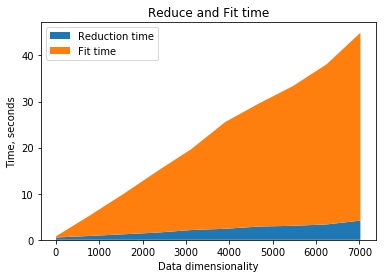

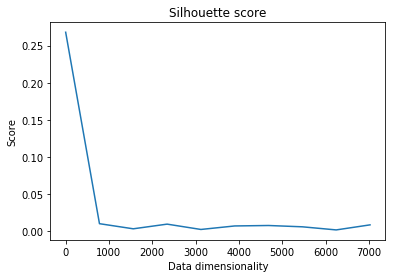

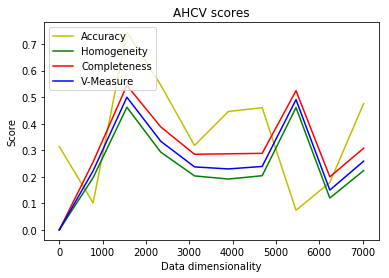

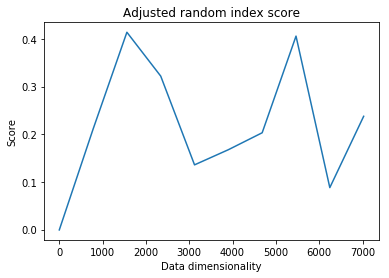

In [7]:
def plot_history(history):
    from matplotlib import pyplot as plt
    %matplotlib inline

    plt.stackplot(history['n'], list(zip(*history['time'])))
    plt.title('Reduce and Fit time')
    plt.ylabel('Time, seconds')
    plt.xlabel('Data dimensionality')
    plt.legend(['Reduction time', 'Fit time'], loc='upper left')
    plt.show()

    plt.plot(history['n'], history['silhouette'])
    plt.title('Silhouette score')
    plt.ylabel('Score')
    plt.xlabel('Data dimensionality')
    plt.show()

    a, h, c, v = zip(*history['ahcv'])
    plt.plot(history['n'], a, 'y', history['n'], h, 'g', history['n'], c, 'r', history['n'], v, 'b')
    plt.title('AHCV scores')
    plt.ylabel('Score')
    plt.xlabel('Data dimensionality')
    plt.legend(['Accuracy', 'Homogeneity', 'Completeness', 'V-Measure'], loc='upper left')
    plt.show()

    plt.plot(history['n'], history['ari'])
    plt.title('Adjusted random index score')
    plt.ylabel('Score')
    plt.xlabel('Data dimensionality')
    plt.show()


plot_history(history)


### Типовые статьи оптимальной модели

In [8]:
print(history)

{'time': [(0.4976959228515625, 0.27127552032470703), (0.8364582061767578, 4.441931486129761), (1.1953113079071045, 8.776051759719849), (1.5662870407104492, 13.352931022644043), (2.117349624633789, 17.55703854560852), (2.391291379928589, 23.149508476257324), (2.8775062561035156, 26.697346925735474), (3.039391279220581, 30.29308843612671), (3.3330228328704834, 34.743205547332764), (4.162913084030151, 40.76650929450989)], 'silhouette': [0.26798987199557517, 0.010410745786686033, 0.0035193211383460136, 0.009803731282150016, 0.002639642686067977, 0.007361023532765652, 0.00796823501649125, 0.006200285943590255, 0.002024073497563816, 0.008821418212782305], 'ahcv': [(0.3141691394658754, 0.0006315609745660522, 0.0006965508512275966, 0.0006624658042981155), (0.10237388724035608, 0.19702760441130185, 0.2560762945980836, 0.22270432446725918), (0.7440652818991098, 0.46205105658269946, 0.54407961004368, 0.49972149150114026), (0.5452522255192879, 0.29323760964154844, 0.3881502595167723, 0.33408359448

In [9]:
optimal_n = 5465

# Clear memory by unsetting the references
reducer, X_reduced, model = None, None, None

reducer = PCA(n_components=optimal_n) if reduction_method == 'PCA' \
    else FeatureAgglomeration(n_clusters=optimal_n) if reduction_method == 'FA' \
    else SparseRandomProjection(n_components=optimal_n)
X_reduced = reducer.fit_transform(X.toarray())

model = KMeans(n_clusters=len(categories)) if clustering_method == 'K-means' \
    else AgglomerativeClustering(n_clusters=len(categories))
labels = model.fit_predict(X_reduced)

print('Optimal model Silhouette score:', silhouette_score(X, labels))
print('Optimal model Adjusted Random index score:', adjusted_rand_score(y, labels))
print('Optimal model accuracy, homogeneity, completeness, v-measure:',
      (accuracy_score(y, labels), *homogeneity_completeness_v_measure(y, labels)))

Optimal model Silhouette score: 0.008389690462419877
Optimal model Adjusted Random index score: 0.450565661789105
Optimal model accuracy, homogeneity, completeness, v-measure: (0.7885756676557863, 0.4897546742946095, 0.5414316144260789, 0.5142982735059884)


In [10]:
scores = silhouette_samples(X_reduced, labels)
labels_best_articles = get_best_articles(data.data, scores, labels)

for label, article in labels_best_articles.items():
    print('Label:', label)
    print('----------')
    print(article)
    print('----------')
    print()

Label: 0
----------
From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)
Subject: Re: Americans and Evolution
Organization: Technical University Braunschweig, Germany
Lines: 67

In article <1pq47tINN8lp@senator-bedfellow.MIT.EDU>
bobs@thnext.mit.edu (Robert Singleton) writes:
 
(Deletion)
>
>I will argue that your latter statement, "I believe that no gods exist"
>does rest upon faith - that is, if you are making a POSITIVE statement
>that "no gods exist" (strong atheism) rather than merely saying I don't
>know and therefore don't believe in them and don't NOT believe in then
>(weak atheism). Once again, to not believe in God is different than saying
>I BELIEVE that God does not exist. I still maintain the position, even
>after reading the FAQs, that strong atheism requires faith.
>
 
No it in the way it is usually used. In my view, you are saying here that
driving a car requires faith that the car drives.
 
For me it is a conclusion, and I have no more faith in it than I have in the
pr